# Week 4

## LaTeX

This is some formula: $\int x^2dx = \frac{1}{3}x^3 + C$
$$\int x^2dx = \frac{1}{3}x^3 + C$$

## k-means: searching for the optimal number of cluster using the elbow method

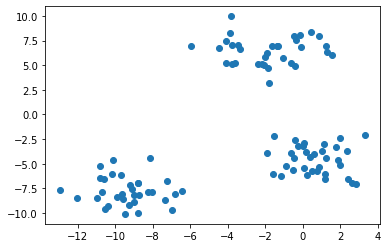

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=100,
                  centers=3,
                  cluster_std=1.5,
                  random_state=100
                 )
plt.scatter(X[:, 0], X[:, 1]);

In [2]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
km.fit(X)

KMeans(n_clusters=3)

In [3]:
km.labels_, km.cluster_centers_

(array([0, 2, 1, 2, 0, 2, 1, 1, 0, 2, 0, 2, 1, 0, 1, 1, 0, 2, 2, 0, 0, 0,
        0, 2, 1, 0, 2, 1, 0, 2, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 1, 0, 2, 1,
        1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 1, 0,
        1, 2, 2, 1, 0, 0, 2, 2, 1, 0, 2, 1, 1, 2, 2, 0, 1, 1, 0, 2, 1, 2,
        2, 1, 2, 1, 1, 2, 1, 1, 0, 0, 1, 0], dtype=int32),
 array([[ 0.6212505 , -4.57520567],
        [-1.82718828,  6.46792023],
        [-9.34190583, -7.76242026]]))

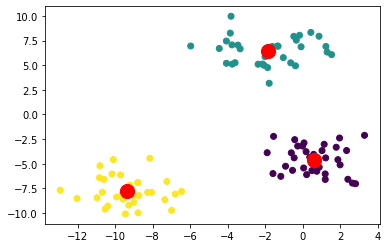

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=km.labels_)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='r', marker='o', s=200);

In [7]:
km.inertia_

439.65024220707636

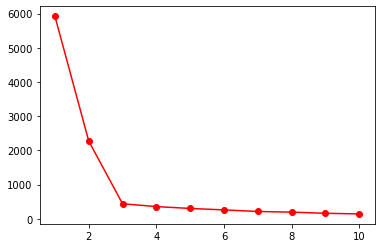

In [8]:
inertia_list = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(X)
    inertia_list.append(km.inertia_)
plt.plot(range(1, 11), inertia_list, 'ro-');

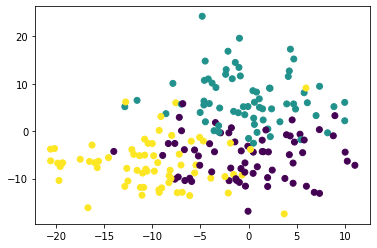

In [9]:
X, y = make_blobs(n_samples=200,
                  centers=3,
                  cluster_std=5,
                  random_state=100
                 )
plt.scatter(X[:, 0], X[:, 1], c=y);

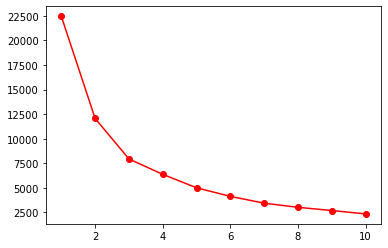

In [10]:
inertia_list = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(X)
    inertia_list.append(km.inertia_)
plt.plot(range(1, 11), inertia_list, 'ro-');

## Project 2

MNIST with k-means.

## Pandas

In [1]:
import pandas as pd

In [2]:
planets = ["Mercury", "Venus", "Earth", "Mars", "Jupyter", "Saturn", "Uranus", "Neptune"]
diameters = [4879, 12104, 12756, 6792, 142984, 120536, 51118, 49528]
temperatures = [167, 464, 15, -65, -110, -140, -195, -200]
gravity = [3.7, 8.9, 9.8, 3.7, 23.1, 9.0, 8.7, 11.0]

### Series

In [3]:
s = pd.Series(diameters)
s

0      4879
1     12104
2     12756
3      6792
4    142984
5    120536
6     51118
7     49528
dtype: int64

In [4]:
s = pd.Series(diameters, index= planets)
s

Mercury      4879
Venus       12104
Earth       12756
Mars         6792
Jupyter    142984
Saturn     120536
Uranus      51118
Neptune     49528
dtype: int64

In [5]:
s["Mars"]

6792

In [6]:
s[["Mars", "Earth"]]

Mars      6792
Earth    12756
dtype: int64

In [8]:
s["Venus":"Saturn"]

Venus       12104
Earth       12756
Mars         6792
Jupyter    142984
Saturn     120536
dtype: int64

In [9]:
s["Pluto"] = 2370
s

Mercury      4879
Venus       12104
Earth       12756
Mars         6792
Jupyter    142984
Saturn     120536
Uranus      51118
Neptune     49528
Pluto        2370
dtype: int64

In [10]:
s.mean()

44785.22222222222

In [11]:
s.max()

142984

In [12]:
s.idxmax()

'Jupyter'

In [13]:
s.argmax()

4

In [14]:
s.idxmin()

'Pluto'

In [15]:
s/1.61

Mercury     3030.434783
Venus       7518.012422
Earth       7922.981366
Mars        4218.633540
Jupyter    88809.937888
Saturn     74867.080745
Uranus     31750.310559
Neptune    30762.732919
Pluto       1472.049689
dtype: float64

In [16]:
def size(x):
    if x < 10000:
        return "small"
    else:
        return "big"
    
s.apply(size)

Mercury    small
Venus        big
Earth        big
Mars       small
Jupyter      big
Saturn       big
Uranus       big
Neptune      big
Pluto      small
dtype: object

## DataFrames

In [18]:
df = pd.DataFrame({"diameters": diameters,
                   "temp": temperatures,
                   "gravity": gravity
                  })
df

,diameters,temp,gravity
0,4879,167,3.7
1,12104,464,8.9
2,12756,15,9.8
3,6792,-65,3.7
4,142984,-110,23.1
5,120536,-140,9.0
6,51118,-195,8.7
7,49528,-200,11.0


In [19]:
df.columns

Index(['diameters', 'temp', 'gravity'], dtype='object')

In [20]:
df.index

RangeIndex(start=0, stop=8, step=1)

In [21]:
df.index = planets
df

,diameters,temp,gravity
Mercury,4879,167,3.7
Venus,12104,464,8.9
Earth,12756,15,9.8
Mars,6792,-65,3.7
Jupyter,142984,-110,23.1
Saturn,120536,-140,9.0
Uranus,51118,-195,8.7
Neptune,49528,-200,11.0


In [22]:
df.head(3)

,diameters,temp,gravity
Mercury,4879,167,3.7
Venus,12104,464,8.9
Earth,12756,15,9.8


In [23]:
df.tail(3)

,diameters,temp,gravity
Saturn,120536,-140,9.0
Uranus,51118,-195,8.7
Neptune,49528,-200,11.0


In [24]:
df.sample(3)

,diameters,temp,gravity
Mercury,4879,167,3.7
Uranus,51118,-195,8.7
Saturn,120536,-140,9.0


## Selecting columns

In [25]:
df["temp"]

Mercury    167
Venus      464
Earth       15
Mars       -65
Jupyter   -110
Saturn    -140
Uranus    -195
Neptune   -200
Name: temp, dtype: int64

In [29]:
df2 = df[["temp", "gravity"]]
df2

,temp,gravity
Mercury,167,3.7
Venus,464,8.9
Earth,15,9.8
Mars,-65,3.7
Jupyter,-110,23.1
Saturn,-140,9.0
Uranus,-195,8.7
Neptune,-200,11.0


In [33]:
df.temp

Mercury    167
Venus      464
Earth       15
Mars       -65
Jupyter   -110
Saturn    -140
Uranus    -195
Neptune   -200
Name: temp, dtype: int64

## loc and iloc 

In [34]:
df.loc["Earth", "gravity"]

9.8

In [35]:
df.loc[["Earth", "Mars"], "gravity"]

Earth    9.8
Mars     3.7
Name: gravity, dtype: float64

In [36]:
df.loc[["Earth", "Mars"], ["temp", "gravity"]]

,temp,gravity
Earth,15,9.8
Mars,-65,3.7


In [37]:
df.iloc[0, 1]

167

In [39]:
df.loc[["Earth", "Mars"]]

,diameters,temp,gravity
Earth,12756,15,9.8
Mars,6792,-65,3.7


In [40]:
df.loc[:, "temp"]

Mercury    167
Venus      464
Earth       15
Mars       -65
Jupyter   -110
Saturn    -140
Uranus    -195
Neptune   -200
Name: temp, dtype: int64

In [41]:
df.iloc[2:5, [0,2]]

,diameters,gravity
Earth,12756,9.8
Mars,6792,3.7
Jupyter,142984,23.1


## Boolean indexing

In [43]:
df["diameters"] > 10000

Mercury    False
Venus       True
Earth       True
Mars       False
Jupyter     True
Saturn      True
Uranus      True
Neptune     True
Name: diameters, dtype: bool

In [46]:
big_planets = df[df["diameters"] > 10000]

In [47]:
big_planets

,diameters,temp,gravity
Venus,12104,464,8.9
Earth,12756,15,9.8
Jupyter,142984,-110,23.1
Saturn,120536,-140,9.0
Uranus,51118,-195,8.7
Neptune,49528,-200,11.0


## Sorting

In [48]:
df

,diameters,temp,gravity
Mercury,4879,167,3.7
Venus,12104,464,8.9
Earth,12756,15,9.8
Mars,6792,-65,3.7
Jupyter,142984,-110,23.1
Saturn,120536,-140,9.0
Uranus,51118,-195,8.7
Neptune,49528,-200,11.0


In [50]:
df.sort_values(by="gravity", ascending=False)

,diameters,temp,gravity
Jupyter,142984,-110,23.1
Neptune,49528,-200,11.0
Earth,12756,15,9.8
Saturn,120536,-140,9.0
Venus,12104,464,8.9
Uranus,51118,-195,8.7
Mercury,4879,167,3.7
Mars,6792,-65,3.7


In [51]:
df.sort_index()

,diameters,temp,gravity
Earth,12756,15,9.8
Jupyter,142984,-110,23.1
Mars,6792,-65,3.7
Mercury,4879,167,3.7
Neptune,49528,-200,11.0
Saturn,120536,-140,9.0
Uranus,51118,-195,8.7
Venus,12104,464,8.9


## Modifying DateFrames

In [52]:
df["temp_F"] = df["temp"]*1.8 +32
df

,diameters,temp,gravity,temp_F
Mercury,4879,167,3.7,332.6
Venus,12104,464,8.9,867.2
Earth,12756,15,9.8,59.0
Mars,6792,-65,3.7,-85.0
Jupyter,142984,-110,23.1,-166.0
Saturn,120536,-140,9.0,-220.0
Uranus,51118,-195,8.7,-319.0
Neptune,49528,-200,11.0,-328.0


In [53]:
df.columns

Index(['diameters', 'temp', 'gravity', 'temp_F'], dtype='object')

In [56]:
df = df[['diameters', 'temp', 'temp_F', 'gravity']]
df

,diameters,temp,temp_F,gravity
Mercury,4879,167,332.6,3.7
Venus,12104,464,867.2,8.9
Earth,12756,15,59.0,9.8
Mars,6792,-65,-85.0,3.7
Jupyter,142984,-110,-166.0,23.1
Saturn,120536,-140,-220.0,9.0
Uranus,51118,-195,-319.0,8.7
Neptune,49528,-200,-328.0,11.0


## aggregations

In [57]:
df.mean()

diameters    50087.1250
temp            -8.0000
temp_F          17.6000
gravity          9.7375
dtype: float64

In [58]:
df.min()

diameters    4879.0
temp         -200.0
temp_F       -328.0
gravity         3.7
dtype: float64

In [59]:
df["gravity"].idxmin()

'Mercury'

In [60]:
df.loc["Mercury"]

diameters    4879.0
temp          167.0
temp_F        332.6
gravity         3.7
Name: Mercury, dtype: float64

In [61]:
df.loc[df["gravity"].idxmin()]

diameters    4879.0
temp          167.0
temp_F        332.6
gravity         3.7
Name: Mercury, dtype: float64

In [64]:
df

,diameters,temp,temp_F,gravity
Mercury,4879,167,332.6,3.7
Venus,12104,464,867.2,8.9
Earth,12756,15,59.0,9.8
Mars,6792,-65,-85.0,3.7
Jupyter,142984,-110,-166.0,23.1
Saturn,120536,-140,-220.0,9.0
Uranus,51118,-195,-319.0,8.7
Neptune,49528,-200,-328.0,11.0


In [67]:
df.columns

Index(['diameters', 'temp', 'temp_F', 'gravity'], dtype='object')

In [69]:
def habitable(p):
    if  -100 < p["temp"] < 50 and p["gravity"] < 12:
        return "Yes"
    else:
        return "No"

df.agg(habitable, axis=1)

Mercury     No
Venus       No
Earth      Yes
Mars       Yes
Jupyter     No
Saturn      No
Uranus      No
Neptune     No
dtype: object

In [71]:
import seaborn as sns

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [72]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [73]:
df["deck"]

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: deck, Length: 891, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [74]:
len(df["deck"])

891

In [75]:
df["deck"].count()

203